In [1]:
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from wordcloud import WordCloud


### Getting tweets

In [2]:
# Authentication
consumerKey = ""
consumerSecret = ""
accessToken = ""
accessTokenSecret = ""
auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [3]:
keyword = "Joe Biden"
tweets = []
tweets.extend(api.search_tweets(q=keyword, count=100))  # twitter allows max 100 per query
len(tweets)

91

### Data Preprocessing

In [4]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'@\w+','',text)
    text = re.sub(r'http\S+','',text)
    text = re.sub(r'www\S+','',text)
    text = re.sub(r'\'s','',text)
    text = re.sub(r'[^a-z\s\.\?\!]','',text)
    text = re.sub(r'^rt','',text)
    return text

def preprocessing(text):
    text = clean_text(text)
    return text

In [5]:
df = pd.DataFrame()
tweet_dict = {'text' : []}
for tweet in tweets:
    # tweet_dict['id'].append(tweet.id)
    # tweet_dict['org_text'].append(tweet.text)
    tweet_dict['text'].append(preprocessing(tweet.text))
df = pd.DataFrame.from_dict(tweet_dict)
df.drop_duplicates(inplace=True)
df

,text
0,thank you joe biden for the dark ages part . u...
1,rep. bob good wants to impeach joe biden. \n...
2,if joe biden wanted to secure the border hed...
3,horas antes\n\nal boris o joe\nfala biden\npr...
4,i want to hear what the ukrainian prosecutor...
...,...
84,black ppls obsession with ppl going to jail ...
86,hey joe biden here that ukrainian pal of yo...
87,joe biden annonce de nouvelles sanctions con...
89,ukraine war live u.s. to provide ukrainians ...


### Sentiment Analysis using TextBlob

In [6]:
for idx, row in df['text'].iteritems():
    scores = TextBlob(row)
    df.loc[idx, 'polarity'] = scores.sentiment.polarity
    df.loc[idx, 'subjectivity'] = scores.sentiment.subjectivity
    polarity = scores.sentiment.polarity
    if polarity > 0:
        sentiment = 'positive'
    elif polarity < 0:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    df.loc[idx, 'sentiment'] = sentiment   
df.head()

,text,polarity,subjectivity,sentiment
0,thank you joe biden for the dark ages part . u...,-0.150000,0.400000,negative
1,rep. bob good wants to impeach joe biden. \n...,0.533333,0.433333,positive
2,if joe biden wanted to secure the border hed...,0.137500,0.444444,positive
3,horas antes\n\nal boris o joe\nfala biden\npr...,0.000000,0.000000,neutral
4,i want to hear what the ukrainian prosecutor...,0.000000,0.000000,neutral


### Plotting Word Clouds

In [7]:
def plot_wordcloud(tweets, keyword=None):
    alltext = ' '.join([t for t in tweets])
    if keyword:
        for key in keyword:
            alltext = re.sub(key.lower(),'',alltext)
    wordcloud = WordCloud().generate(alltext)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

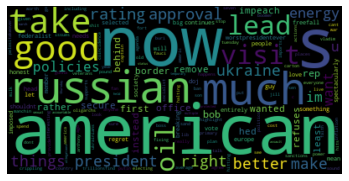

20

In [8]:
# plot positive tweets word cloud
pos_tweets = df[df['sentiment'] == 'positive']['text']
plot_wordcloud(pos_tweets, keyword=keyword.split())
len(pos_tweets)

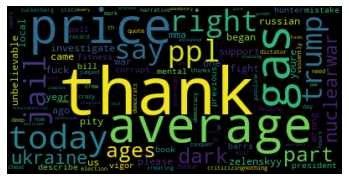

13

In [9]:
# plot negative tweets word cloud
neg_tweets = df[df['sentiment'] == 'negative']['text']
plot_wordcloud(neg_tweets, keyword=keyword.split())
len(neg_tweets)